In [1]:
# comparisons
# https://docs.google.com/spreadsheets/u/1/d/e/2PACX-1vTX5x2nxCde90Zwo83cdixZsyd_hU1orGsGYKpDe344wHeFi9MqI71aZYC6GLjOV_P2lp6_lUoacPNa/pubhtml?gid=1467787327&single=true
# https://twitter.com/jkwan_md/status/1312035412274221058?s=21
# https://russell-pollari.github.io/ontario-covid19/

import pandas as pd
import numpy as np
import urllib, json
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PolyCollection
import seaborn as sns
import datetime as dt
import geopandas as gpd
import folium
from shapely.geometry import Point, Polygon

# set the standard plot size
plt.rcParams['figure.figsize']=(30,15)

In [2]:
# get the "Confirmed positive cases of COVID19 in Ontario" data
# https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario/resource/455fd63b-603d-4608-8216-7d8647f43350
# import data using the ontario open data API
# make sure to check the limit against current cases
url = "https://data.ontario.ca/en/api/3/action/datastore_search?resource_id=455fd63b-603d-4608-8216-7d8647f43350&limit=75000"
response = urllib.request.urlopen(url)
data = json.loads(response.read().decode('utf-8'))

# use this if you want to see the json
# print (data['result']['records'])

# use this if you want to write it to a pandas dataframe
df = pd.DataFrame(data['result']['records'])

In [3]:
# get the "Status of COVID-19 Cases in Ontario" data
# https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario
# make sure to check the limit against current cases
url = "https://data.ontario.ca/en/api/3/action/datastore_search?resource_id=ed270bb8-340b-41f9-a7c6-e8ef587e6d11&limit=75000"
response = urllib.request.urlopen(url)
data = json.loads(response.read().decode('utf-8'))

# use this if you want to see the json
# print (data['result']['records'])

status_df = pd.DataFrame(data['result']['records'])

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72051 entries, 0 to 72050
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   _id                        72051 non-null  int64  
 1   Row_ID                     72051 non-null  int64  
 2   Accurate_Episode_Date      72049 non-null  object 
 3   Case_Reported_Date         72050 non-null  object 
 4   Test_Reported_Date         71046 non-null  object 
 5   Specimen_Date              48731 non-null  object 
 6   Age_Group                  72051 non-null  object 
 7   Client_Gender              72051 non-null  object 
 8   Case_AcquisitionInfo       72051 non-null  object 
 9   Outcome1                   72051 non-null  object 
 10  Outbreak_Related           72051 non-null  object 
 11  Reporting_PHU              72051 non-null  object 
 12  Reporting_PHU_Address      72051 non-null  object 
 13  Reporting_PHU_City         72051 non-null  obj

,_id,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,1,2020-10-16T00:00:00,2020-10-17T00:00:00,2020-10-17T00:00:00,2020-10-17T00:00:00,30s,FEMALE,OB,Resolved,Yes,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156
1,2,2,2020-10-22T00:00:00,2020-10-23T00:00:00,2020-10-23T00:00:00,2020-10-22T00:00:00,30s,FEMALE,OB,Not Resolved,Yes,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156
2,3,3,2020-10-09T00:00:00,2020-10-10T00:00:00,2020-10-12T00:00:00,2020-10-10T00:00:00,20s,FEMALE,OB,Resolved,Yes,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156
3,4,4,2020-08-14T00:00:00,2020-08-22T00:00:00,2020-08-22T00:00:00,2020-08-21T00:00:00,40s,FEMALE,OB,Resolved,Yes,Southwestern Public Health,1230 Talbot Street,St. Thomas,N5P 1G9,www.swpublichealth.ca,42.777804,-81.151156
4,5,5,2020-08-09T00:00:00,2020-08-10T00:00:00,2020-08-10T00:00:00,2020-08-09T00:00:00,60s,FEMALE,No known epi link,Resolved,,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239


In [5]:
status_df.info()
status_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   _id                                                       265 non-null    int64  
 1   Reported Date                                             265 non-null    object 
 2   Confirmed Negative                                        47 non-null     float64
 3   Presumptive Negative                                      12 non-null     float64
 4   Presumptive Positive                                      25 non-null     float64
 5   Confirmed Positive                                        263 non-null    float64
 6   Resolved                                                  253 non-null    float64
 7   Deaths                                                    225 non-null    float64
 8   Total Cases         

,_id,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths
0,1,2020-01-26T00:00:00,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2020-01-27T00:00:00,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2020-01-28T00:00:00,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2020-01-30T00:00:00,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2020-01-31T00:00:00,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# sort by date
df = df.sort_values(by=['Accurate_Episode_Date'], ascending=False);
status_df = status_df.sort_values(by=['Reported Date'], ascending=True);

In [7]:
# see how many new cases are reported today in the "confirmed positive" dataset (make sure to change value to today's date)
# keep in mind that the numbers are always missing the most recent day or two
today = df[df['Accurate_Episode_Date'].str.contains("2020-10-23", na=False)]
today.head()

,_id,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
9216,9196,9196,2020-10-23T00:00:00,2020-10-24T00:00:00,2020-10-24T00:00:00,2020-10-23T00:00:00,60s,FEMALE,Missing Information,Not Resolved,,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
66433,66433,66433,2020-10-23T00:00:00,2020-10-24T00:00:00,2020-10-24T00:00:00,2020-10-24T00:00:00,40s,FEMALE,CC,Not Resolved,,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
2579,2563,2563,2020-10-23T00:00:00,2020-10-26T00:00:00,2020-10-26T00:00:00,2020-10-23T00:00:00,<20,MALE,Missing Information,Not Resolved,,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
48422,48355,48355,2020-10-23T00:00:00,2020-10-25T00:00:00,2020-10-25T00:00:00,2020-10-23T00:00:00,30s,MALE,OB,Not Resolved,Yes,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
9635,9612,9612,2020-10-23T00:00:00,2020-10-25T00:00:00,2020-10-25T00:00:00,2020-10-23T00:00:00,30s,MALE,Missing Information,Not Resolved,,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893


In [8]:
# set the dates to datetime64 for later use
df["Accurate_Episode_Date"] = df["Accurate_Episode_Date"].astype("datetime64")
df["Case_Reported_Date"] = df["Case_Reported_Date"].astype("datetime64")
df["Test_Reported_Date"] = df["Test_Reported_Date"].astype("datetime64")
df["Specimen_Date"] = df["Specimen_Date"].astype("datetime64")

In [9]:
# for accurate daily totals, better to use the "status of covid cases" dataset
# you'll need to create a new column for daily growth in cases
status_df['New Cases'] = status_df['Total Cases'].diff(periods=1).fillna(0)

In [10]:
status_df.tail()

,_id,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths,New Cases
260,261,2020-10-23T00:00:00,NaN,NaN,NaN,6474.0,58799.0,3080.0,68353.0,4825851.0,40019.0,35436,276.0,78.0,47.0,6524.0,2796.0,1987.0,8.0,826.0
261,262,2020-10-24T00:00:00,NaN,NaN,NaN,6821.0,59424.0,3086.0,69331.0,4870002.0,44151.0,30922,294.0,82.0,53.0,6607.0,2805.0,1989.0,8.0,978.0
262,263,2020-10-25T00:00:00,NaN,NaN,NaN,7120.0,60160.0,3093.0,70373.0,4908771.0,38769.0,23601,278.0,79.0,54.0,6637.0,2820.0,1989.0,8.0,1042.0
263,264,2020-10-26T00:00:00,NaN,NaN,NaN,7286.0,60839.0,3099.0,71224.0,4937423.0,28652.0,17603,295.0,78.0,51.0,6678.0,2822.0,1991.0,8.0,851.0
264,265,2020-10-27T00:00:00,NaN,NaN,NaN,7418.0,61530.0,3103.0,72051.0,4961368.0,23945.0,22636,312.0,75.0,52.0,6705.0,2837.0,1994.0,8.0,827.0


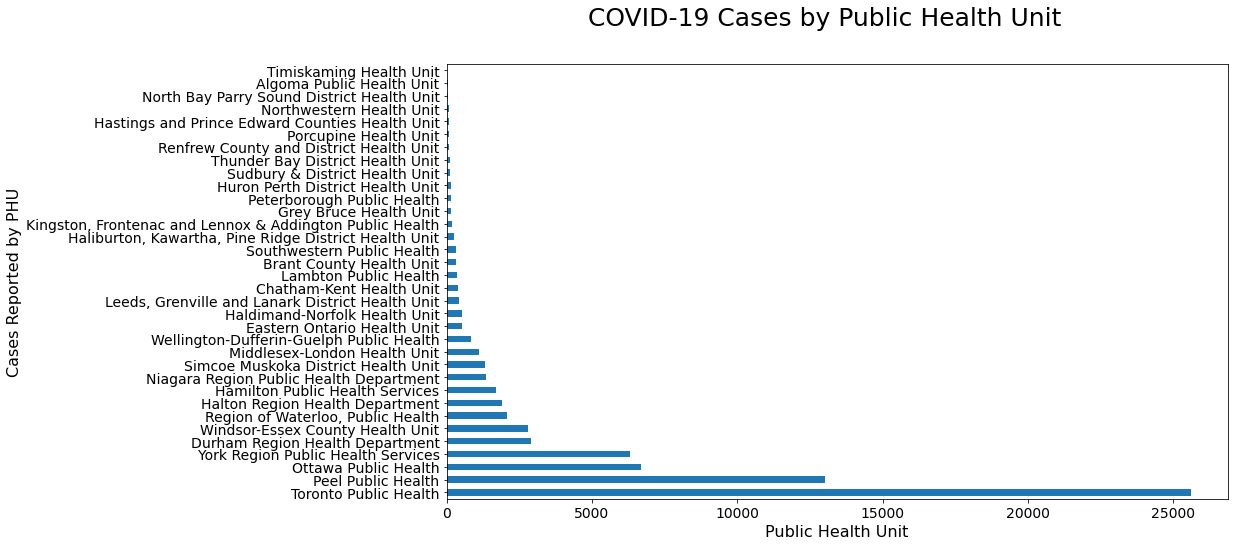

In [11]:
# plot cases by public health unit
fig = plt.figure()
fig.suptitle('COVID-19 Cases by Public Health Unit', fontsize=25) # Add the text/suptitle to figure

ax = df['Reporting_PHU'].value_counts().plot(
    kind='barh', 
    figsize=(14,8)
)
ax.set_xlabel("Public Health Unit", fontsize=16)
ax.set_ylabel("Cases Reported by PHU", fontsize=16)
ax.tick_params(axis='both', labelsize=14)

# if you want to save your graph
# fig.savefig('PHU.jpg')

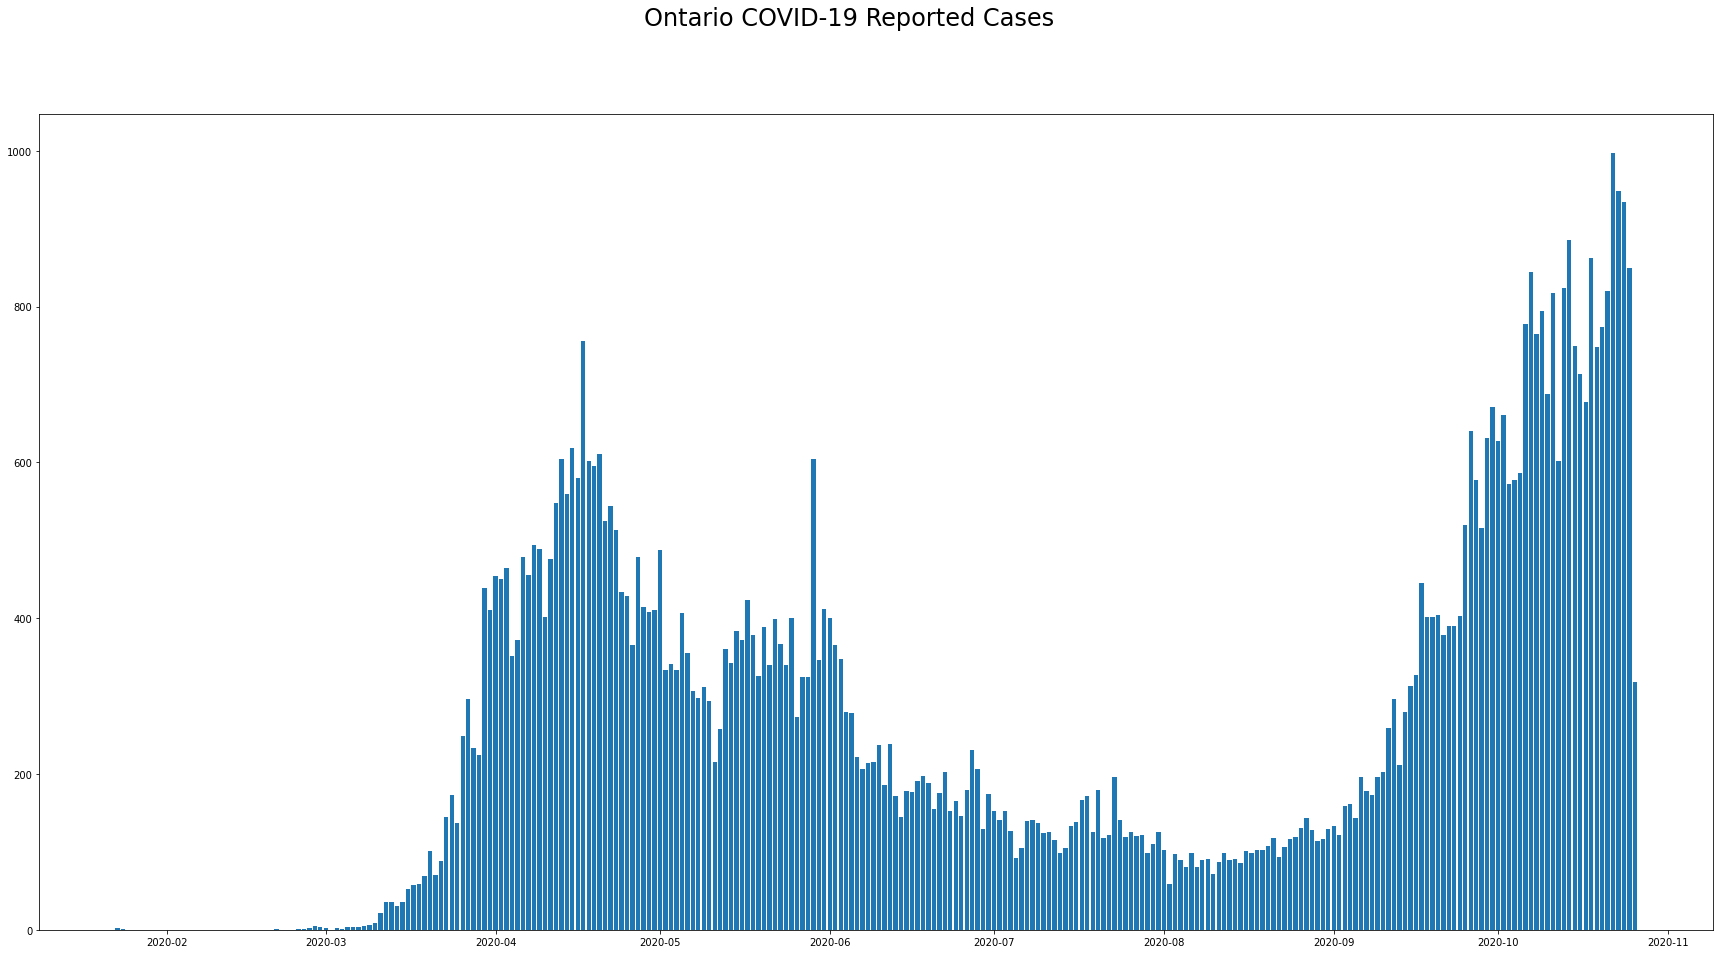

In [12]:
# use matplotlib to plot reported cases from the "conpos" dataset
fig = plt.figure()
fig.suptitle('Ontario COVID-19 Reported Cases', fontsize=24) # Add the text/suptitle to figure

counts = df['Case_Reported_Date'].value_counts()
plt.bar(counts.index,counts)

# ax.set_xlabel("Public Health Unit", fontsize=16)
# ax.set_ylabel("Cases Reported by PHU", fontsize=16)
# ax.tick_params(axis='both', labelsize=14)
plt.show()

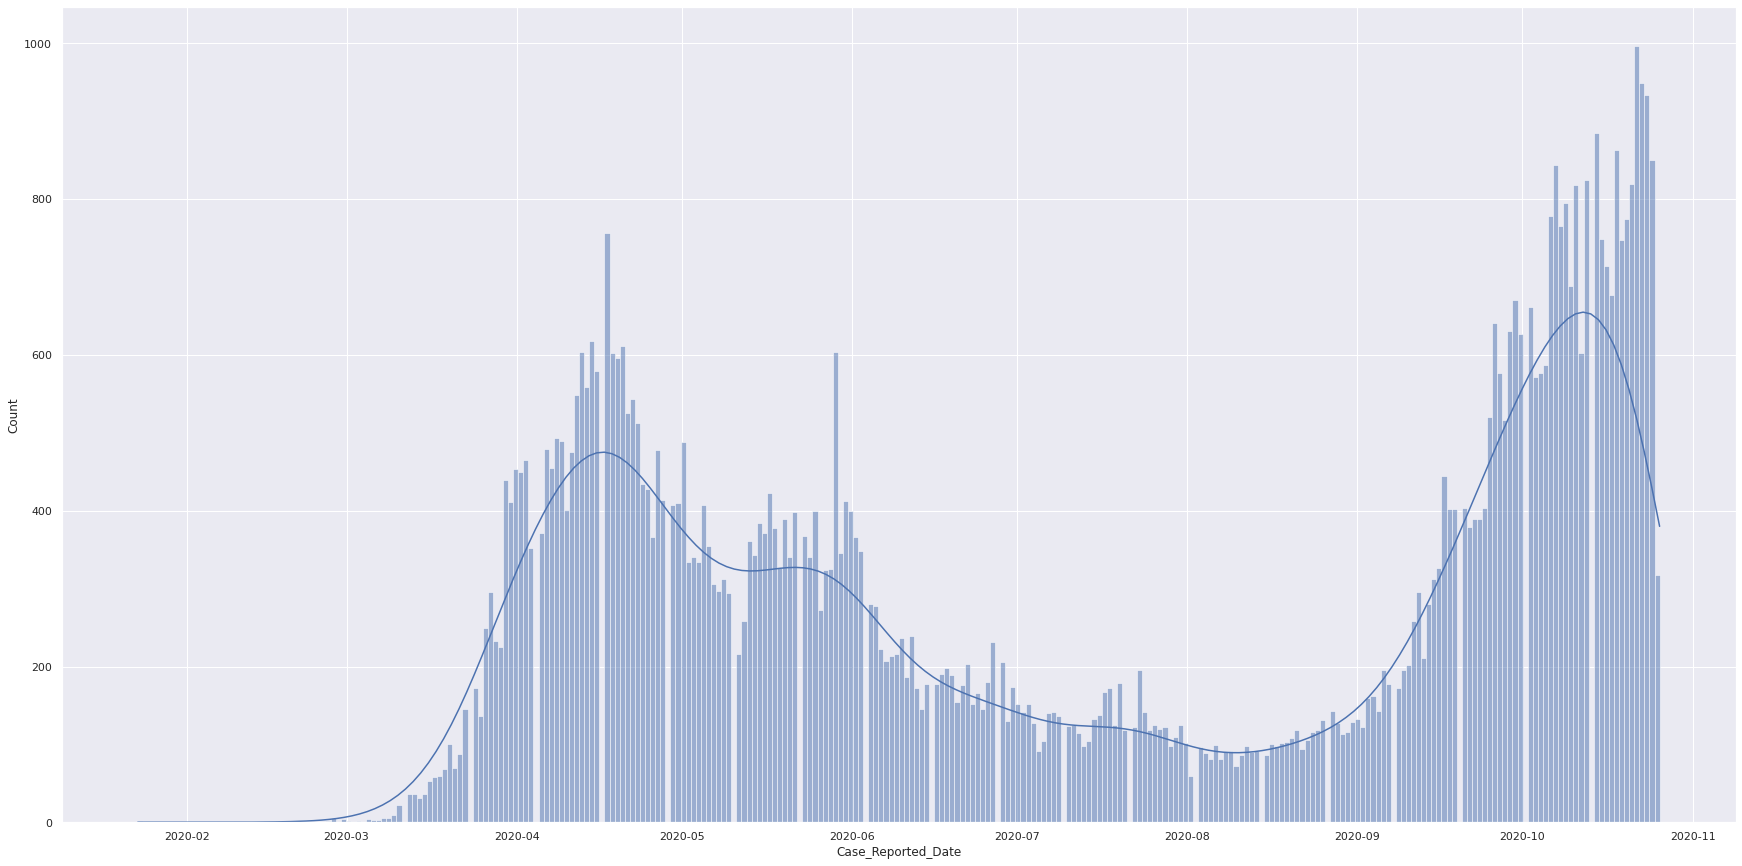

In [13]:
# same thing, but using seaborn lets us plot a kernel density estimate (which can visually stand in for a running average)
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html

sns.set()
ax = sns.histplot(df['Case_Reported_Date'], kde=True, bins=300)

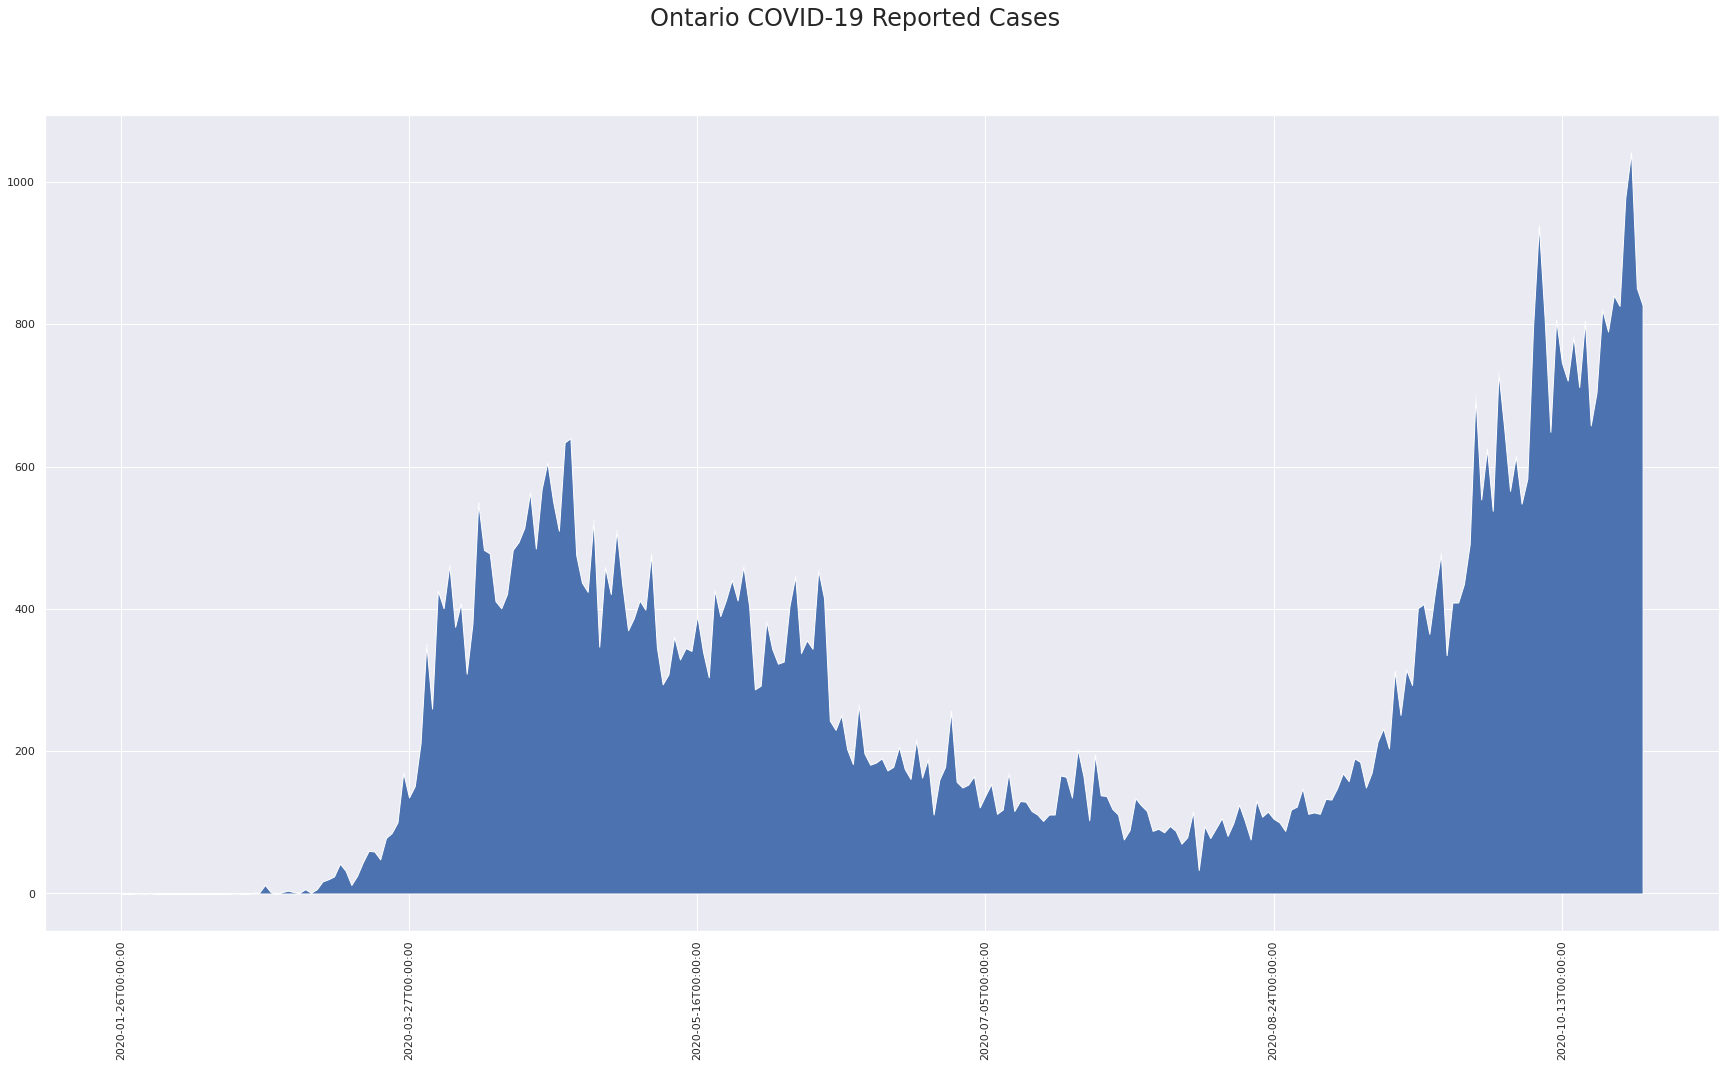

In [14]:
# use matplotlib to plot actual new cases based on reported change in the "Status of COVID" dataset
fig = plt.figure()
fig.suptitle('Ontario COVID-19 Reported Cases', fontsize=24) # Add the text/suptitle to figure

y = status_df['New Cases']
x = status_df['Reported Date']
#plt.bar(counts.index,counts)

# plt.plot(x, y) # line plot
plt.fill_between(x, y) # area plot
plt.tick_params(axis ='x', rotation = 90)
plt.xticks(np.arange(0, 300, 50))

plt.show()

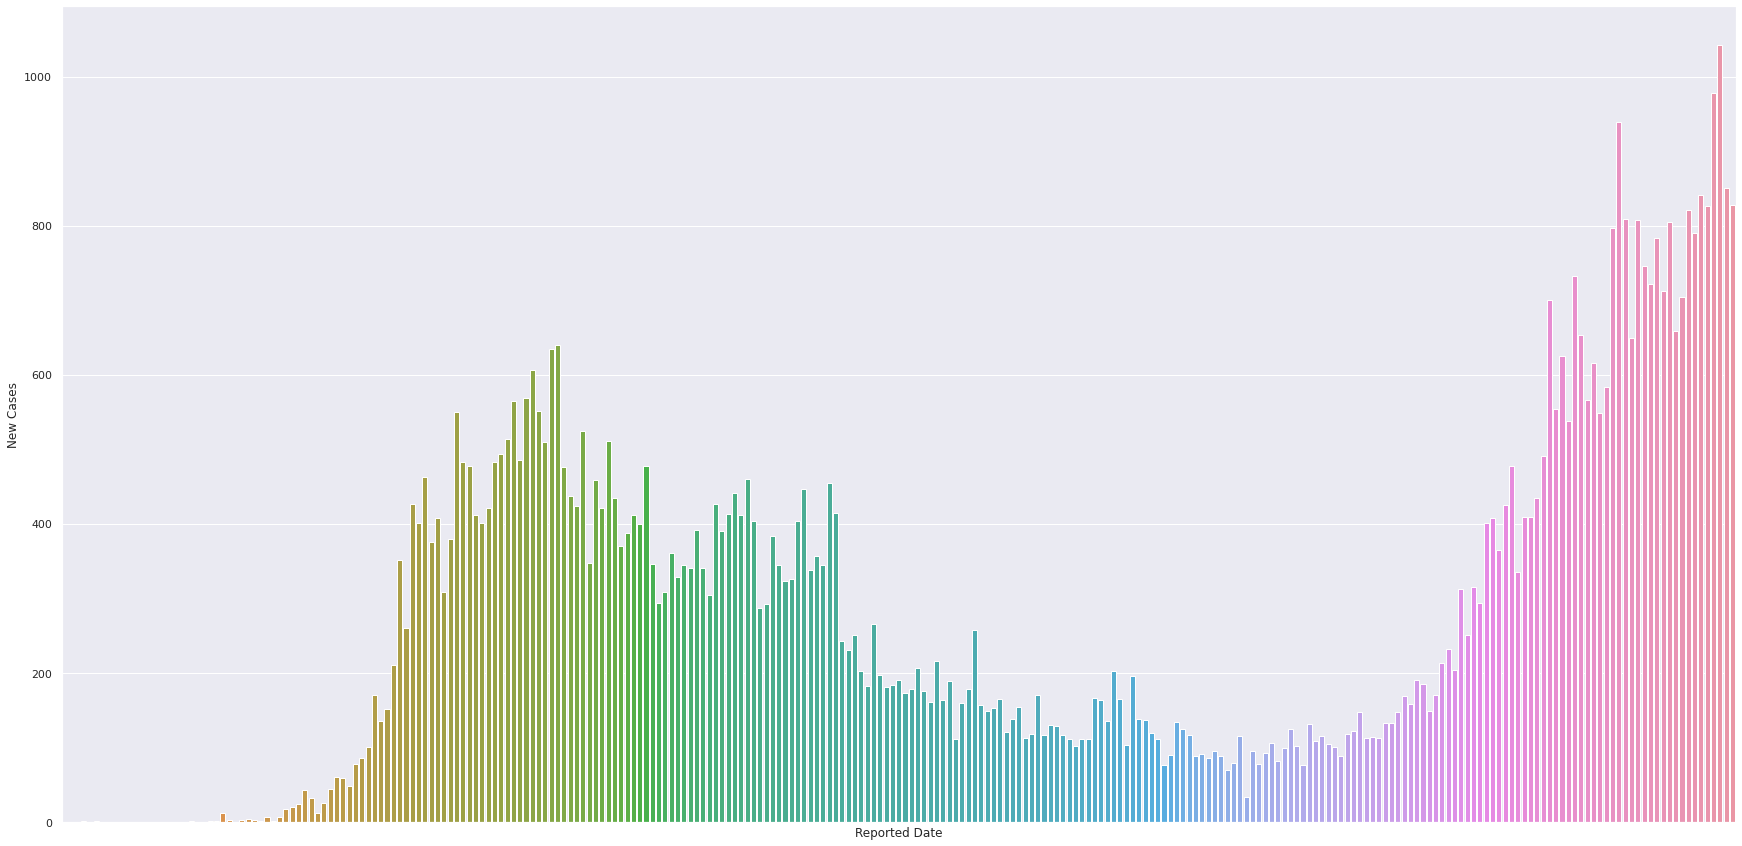

In [15]:
# using seaborn's barplot
g = sns.barplot(x="Reported Date", y="New Cases",  data=status_df)
g.set(xticks=[]);

# g.fig.set_size_inches(30,15) # and we'll use this to change the figure size

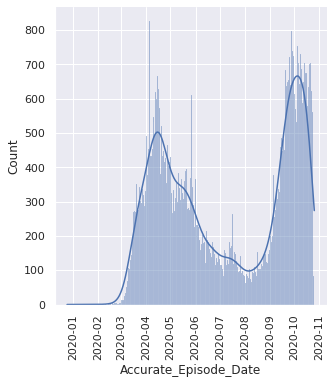

In [16]:
# using seaborn's displot method
g = sns.displot(df, x="Accurate_Episode_Date", kde=True, bins=300)
g.set_xticklabels(rotation=90)
# g.fig.set_size_inches(30,15) # and we'll use this to change the figure size (already done in cell 1)

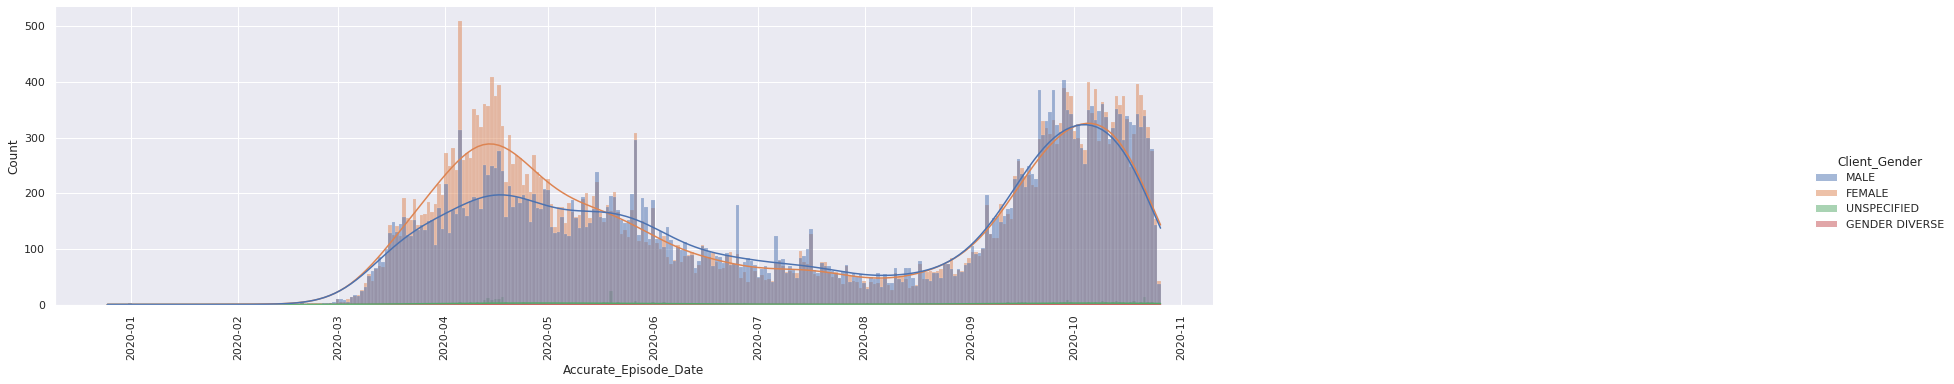

In [17]:
# comparisons based on gender
g = sns.displot(df, x="Accurate_Episode_Date", hue="Client_Gender", kde=True, bins=300)
g.set_xticklabels(rotation=90)
g.fig.set_size_inches(30,5)

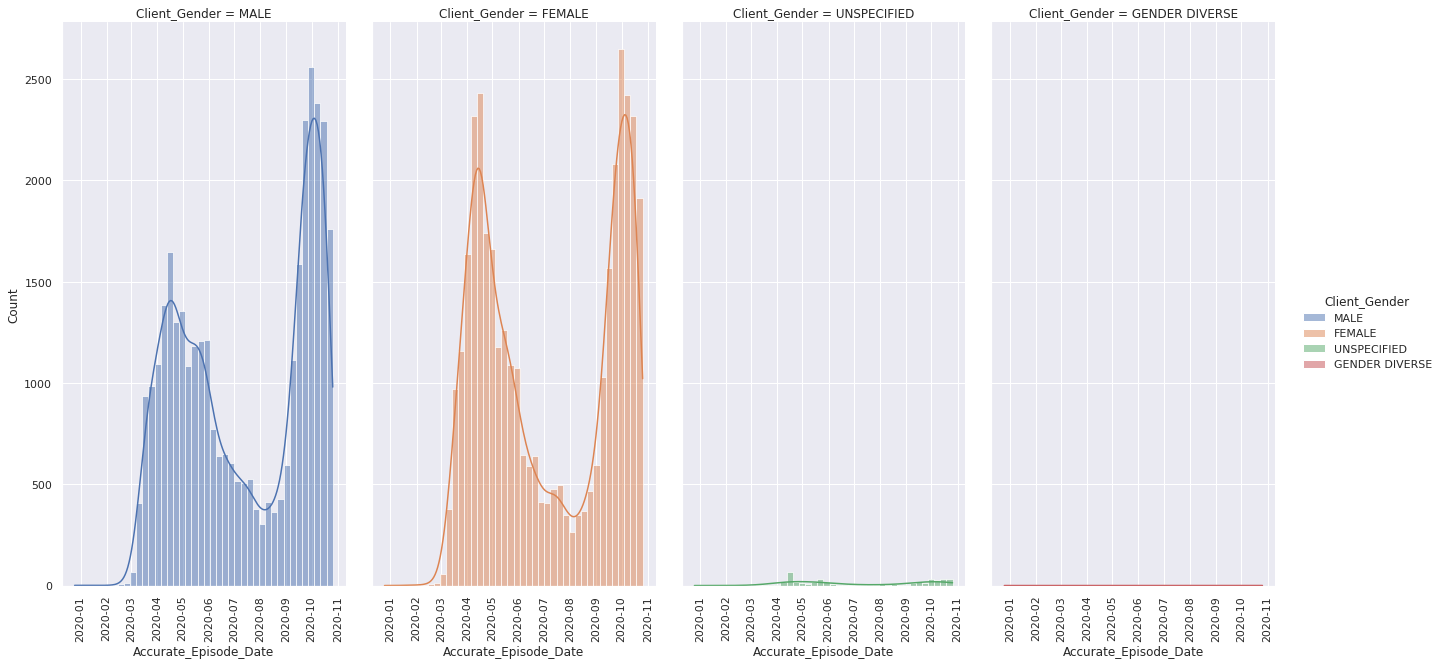

In [18]:
# side-by-side comparison based on gender
g = sns.displot(df, x="Accurate_Episode_Date", hue="Client_Gender", col="Client_Gender", kde=True)
g.set_xticklabels(rotation=90)
sns.set(font_scale=1.3) # seaborn's method for setting fontsize is pretty dumb
g.fig.set_size_inches(20,10)


# And what else might we consider visualizing while we're at it? Maybe age group by gender... 


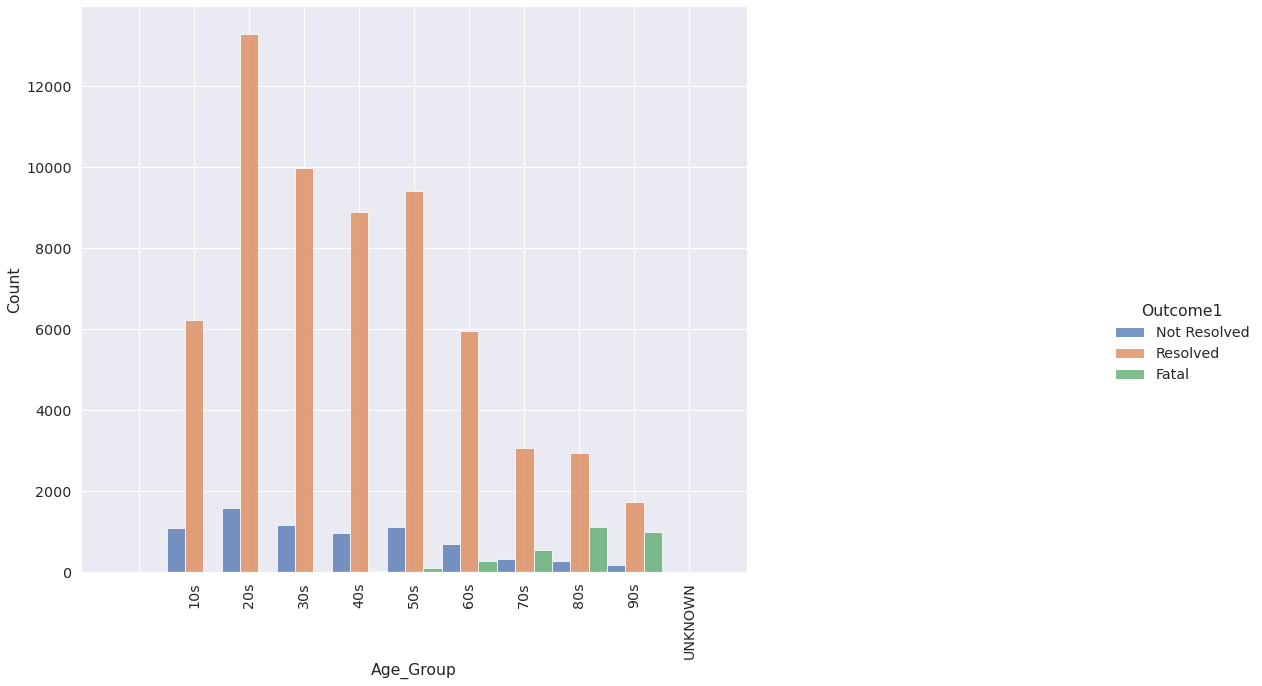

In [19]:
# or how about age group x outcome
df = df.replace(['<20'],'10s') # either re-set the order, or re-name <20 to something like 10s
df = df.sort_values('Age_Group', ascending=True) 

g = sns.displot(df, x="Age_Group", hue="Outcome1", multiple="dodge")
g.set_xticklabels(rotation=90)
g.fig.set_size_inches(20,10)


# Some things to fix: 

* Re-order x axis (seaborn won't order age groups by default)
* Increase fonts (or change default matplotlib/seaborn options at the top of my notebook)
* Change colour palettes
* Make sure my H x W ratios are appropriate (see here: https://stats.stackexchange.com/questions/185346/what-is-the-best-ratio-between-width-and-height-in-a-bar-chart)
* Get rid of the NaNs in the dataset
* Make some more space between the age categories


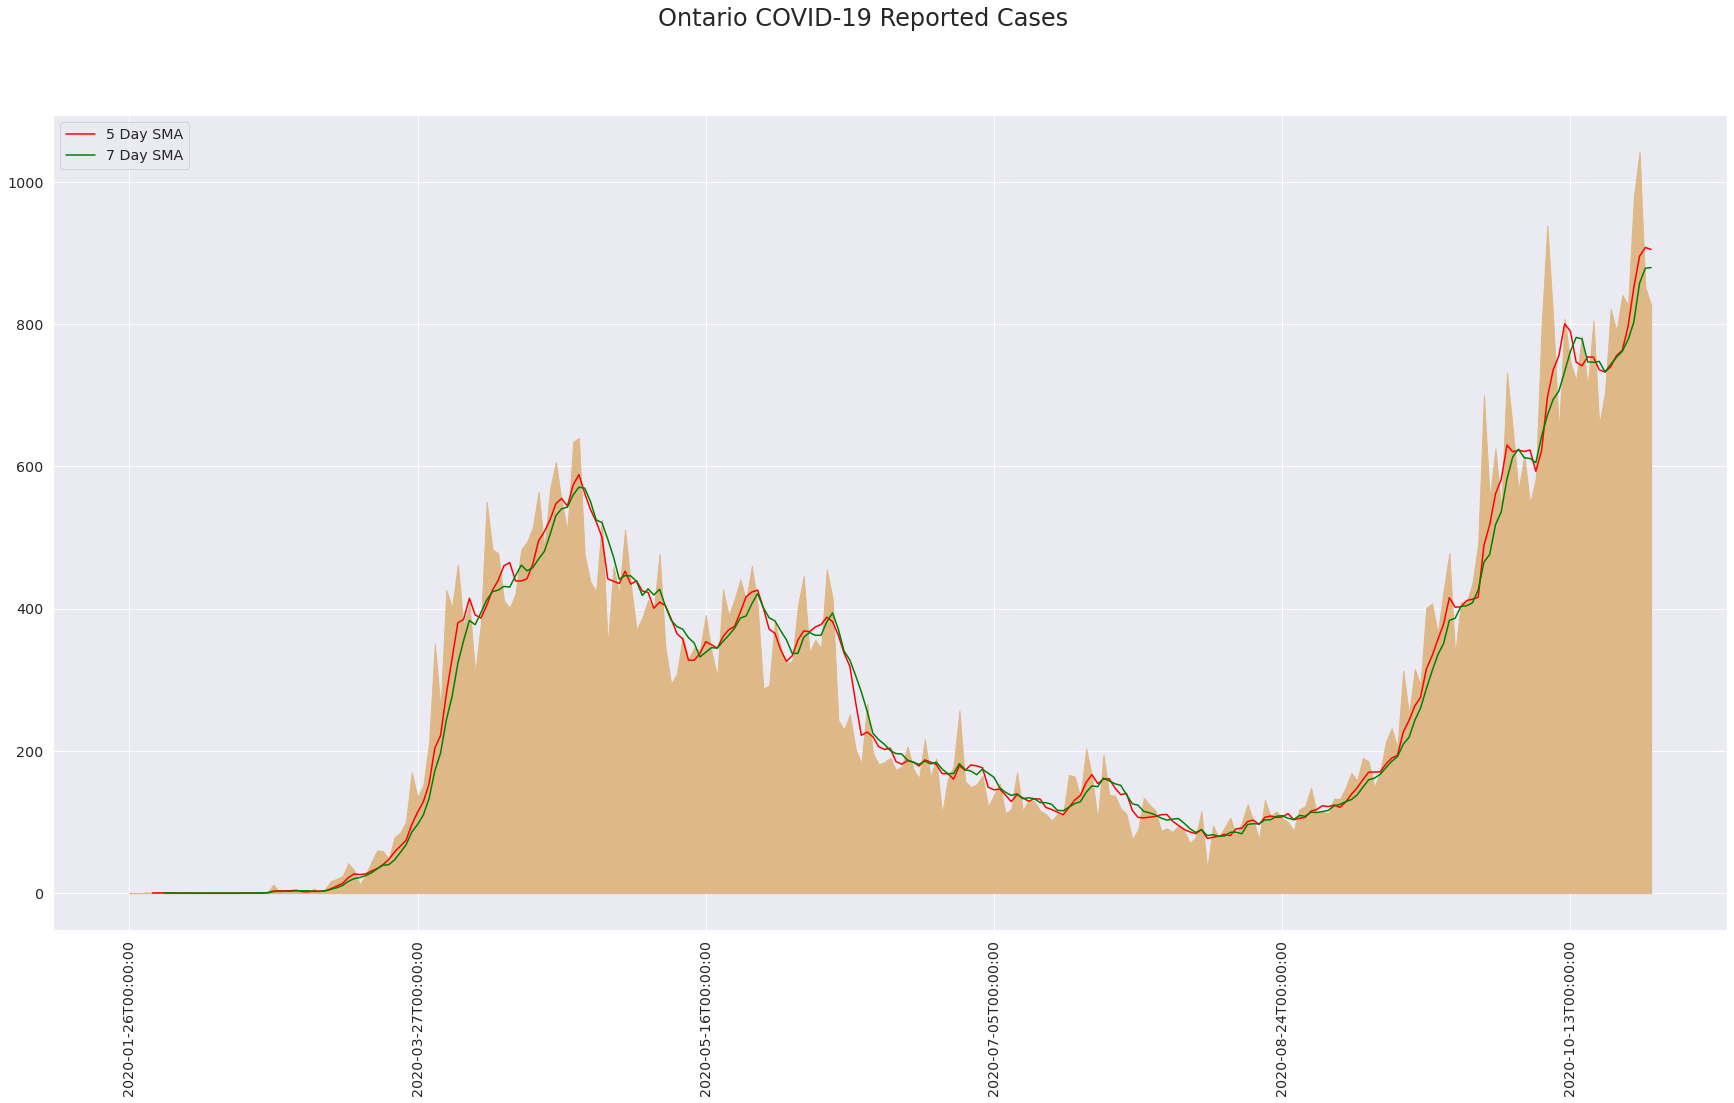

In [20]:
# add moving averages
fig = plt.figure()
fig.suptitle('Ontario COVID-19 Reported Cases', fontsize=24) # Add the text/suptitle to figure

# variables for x and y axes
y = status_df['New Cases']
x = status_df['Reported Date']

# create some rolling averages
rolling_mean5 = y.rolling(window=5).mean()
rolling_mean7 = y.rolling(window=7).mean()

#plt.bar(counts.index,counts)
#plt.bar(x, y, color='burlywood')
plt.fill_between(x, y, color='burlywood') # area plot
plt.plot(x, rolling_mean5, label='5 Day SMA', color='red')
plt.plot(x, rolling_mean7, label='7 Day SMA', color='green')
plt.tick_params(axis ='x', rotation = 90)
plt.xticks(np.arange(0, 300, 50))
plt.legend(loc='upper left')
plt.show()

In [21]:
# do stacked area to show rates for different PHUs
# add Rt a la https://twitter.com/imgrund/status/1320349313164333058/photo/1